In [5]:
import numpy
import os
import re
import binascii
from time import time

In [6]:
def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("./awd_1990_00"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [7]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 379


In [8]:
# just open one file and read its abstract
def read_file(fname):
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces
        return abstract

fname = get_fnames()[1]
print(read_file(fname))

This award provides partial travel support for approximately 25 US academic researchers to the Second World Congress on Particulate Technology scheduled for September 19-22, 1990 in Kyoto, Japan. This Congress is expected to draw 250 papers and 500 to 700 attendees from around the world. Topics to be covered include particle formation, dispersion, conveying, agglomeration, attrition, separation, and characterization. Particle processing is of very great importance to the chemical, minerals, energy, and high-tech material industries. The Congress provides a favorable forum for assessing the state-of-the-art world wide, but especially in Japan, of a wide range of topics relevant to particle processing.


In [48]:
def get_shingles(fname, k=5):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces

        L = len(abstract)
        shingles = set()  # we use a set to automatically eliminate duplicates
        for i in range(L-k+1):
            shingle = abstract[i:i+k]
            crc = binascii.crc32(shingle.encode('utf-8')) #& 0xffffffff  # hash the shingle to a 32-bit integer
            shingles.add(crc)
        return shingles

In [50]:
fname = get_fnames()[0]
print("file: {}".format(fname))
#print("number of shingles: {}".format(len(get_shingles(fname, k=5))))
print("number of shingles: {}".format(get_shingles(fname, k=5)))

file: ./awd_1990_00/a9000616.txt
number of shingles: {3361847299, 2713403395, 1296771077, 137453574, 37695495, 857438213, 2456297481, 2888189962, 14372875, 658997258, 1828335626, 1670995982, 34060303, 4021045262, 430532625, 2113132561, 3216736276, 3154360341, 2863618070, 1125644311, 3245344760, 4015761434, 3308625947, 1727701024, 664975393, 436064291, 501809188, 2469187621, 3785351205, 362821671, 2856216616, 1320001576, 3211124778, 2725929, 1521160241, 2632302643, 163579958, 1901307960, 2464399419, 816592956, 1271562299, 4241432638, 3987564607, 2944514112, 2464337983, 550928451, 2776748101, 1667596359, 4257503303, 640391242, 2931046475, 646971469, 1993803857, 1665697875, 3801481299, 2694608980, 2647879770, 857421914, 1617389660, 3890397274, 2137485406, 880779359, 668231772, 585338670, 1757171810, 3981740130, 4163760227, 2520060005, 2869434469, 3864469612, 309430383, 3285661809, 3877527667, 934627444, 2658050163, 4068431994, 1335406717, 2058692734, 4264804479, 4234197119, 683419777, 895

In [51]:
# set global parameters to process the whole dataset
bands = 10
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID
A = numpy.random.randint(0, nextPrime, size=(nsig,))
B = numpy.random.randint(0, nextPrime, size=(nsig,))

In [52]:
ShingleID = list(get_shingles(fname, k=5))[0]
print("random shingle: {}".format(ShingleID))
hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash functinon: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 3361847299
its hash code by first hash functinon: 505278698
its hash code by second hash function: 3450068164


In [53]:
# naive version of Minhash algorithm that computes a signature for a single file
# all shingles from that file are given in 'shingles'
def minhash(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = []
    for i in range(nsig):  # number of hash functions == nsig
        minHashCode = maxShingleID + 1
        a = A[i]
        b = B[i]
        
        for ShingleID in shingles:
            hashCode = ((a*ShingleID + b) % nextPrime) % maxShingleID
            if hashCode < minHashCode:
                minHashCode = hashCode

        signature.append(minHashCode)
    return signature

In [54]:
fname = get_fnames()[3]
shingles = get_shingles(fname, k=5)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID
A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))
signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {}".format(signature))

file signature: [3236070, 984050, 803749, 5282765, 1526231, 338627, 4088367, 375494, 1232181, 5568543, 2833889, 4187450, 9997740, 340279, 3016723, 5064813, 20240709, 13331329, 1423361, 13099848, 12335173, 1585197, 21013701, 933999, 260096, 3206417, 14085154, 31026428, 13293641, 22377114, 170165, 236885, 3430425, 4811368, 3317413, 4478163, 1248240, 5013736, 242631, 7615892, 272256, 11150589, 713659, 14413702, 6457907, 5410789, 190297, 3880986, 1543493, 1195973, 1189788, 467721, 10323431, 6040656, 614194, 167654, 887224, 3726943, 1031740, 7158624, 4325315, 4084224, 12188363, 636242, 2341452, 3028896, 6447750, 2122098, 10631843, 981908, 9621193, 36332187, 12602699, 11417973, 22219451, 4799404, 15137409, 15231260, 109164, 9616412, 5190831, 15574902, 2378536, 2914188, 18618110, 10976922, 1778140, 19853767, 7359066, 4239177, 747242, 888417, 760345, 2769792, 13023505, 2910676, 9379024, 5637575, 5509342, 7361009]


In [55]:
# compute Minhashes for all files using a slow naive code
fnames = get_fnames()
signatures = []
t = time()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)
t1 = time()-t
print("total signatures: {}".format(len(signatures)))
print("took {:.3f} seconds".format(t1))

total signatures: 379
took 32.236 seconds


In [56]:
# fast implementation of Minhash algorithm
# computes all random hash functions for a shingle at once, using vector operations
# also finds element-wise minimum of two vectors efficiently
def minhash_fast(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

In [57]:
# compare two versions of Minhash code
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=5))

t = time()
signatures_all_files_1 = []
for shingles in shingles_all_files:
    signature = minhash(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_1.append(signature)
t1 = time()-t
print("slow code took {:.3f} seconds".format(t1))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_fast(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("slow code took {:.3f} seconds".format(t2))

print('speedup {}'.format(t1/t2))

signatures_all_files_1 = numpy.array(signatures_all_files_1)
signatures_all_files_2 = numpy.array(signatures_all_files_2)
print("results are the same: {:.3f}".format(numpy.allclose(signatures_all_files_1, signatures_all_files_2)))

slow code took 31.916 seconds
slow code took 3.761 seconds
speedup 8.485271649799738
results are the same: 1.000


In [58]:
# get candidate pairs without Locality-Sensitive Hashing

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_fast(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.9  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in two vectors
        if Jsim >= s:
            candidates.append((i,j))
t2 = time() - t
print("finding candidates took {:.3f} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 1.107 seconds
found 34 candidates
candidate similar pairs of files are:
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000379.txt
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000927.txt
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000378.txt
./awd_1990_00/a9000712.txt ./awd_1990_00/a9000594.txt
./awd_1990_00/a9000379.txt ./awd_1990_00/a9000927.txt
./awd_1990_00/a9000379.txt ./awd_1990_00/a9000378.txt
./awd_1990_00/a9000410.txt ./awd_1990_00/a9000409.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000528.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000404.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000222.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000944.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000221.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000806.txt ./awd_1990_00/a9000594.txt
./awd_1990_00/a9000962.txt ./awd_1990_00/a9000356.txt
./awd_1990_00/a9000962.txt ./awd_1990_00/a9000527.txt
./awd_1990_00/a9000528.txt ./awd_1990_00

In [59]:
read_file('./awd_1990_00/a9000177.txt')

"In January 1988 a seismic tomography experiment was carried out on the East Pacific Rise at 9 degrees 30'N to image in three- dimensions the seismic velocity structure of the rise axis. This experiment yielded a seismic data set consisting of more that 8000 records from approximately 500 shots and 15 ocean bottom seismometers. Initial results from the tomographic inversion of P wave delay times indicate substantial heterogeneity in structure both across and along the rise axis; for instance, the axial low velocity anomaly at 2 km depth is 1.5km/s slower than off axis; the along-axis variations in this velocity anomaly exceed 20%. This renewal will continue the investigation of seismic velocity models using improved inversion techniques, will explore methods of utilizing waveform amplitude information to constrain further the 3-D seismic structure, and will analyze and interpret the gravity, magnetic, and microearthquake data obtained during the course of the tomography experiment."

In [60]:
read_file('./awd_1990_00/a9000458.txt')


" In February 1988 a seismic tomography experiment was carried out on the East Pacific Rise at 9 degrees 30'N to image in three- dimensions the seismic velocity structure of the rise axis. This experiment yielded a seismic data set consisting of more that 8000 records from approximately 500 shots and 15 ocean bottom seismometers. Initial results from the tomographic inversion of P wave delay times indicate substantial heterogeneity in structure both across and along the rise axis; for instance, the axial low velocity anomaly at 2 km depth is 1.5km/s slower than off axis; the along-axis variations in this velocity anomaly exceed 20%. This renewal will continue the investigation of seismic velocity models using improved inversion techniques, will explore methods of utilizing waveform amplitude information to constrain further the 3-D seismic structure, and will analyze and interpret the gravity, magnetic, and microearthquake data obtained during the course of the tomography experiment."

In [61]:
signatures = numpy.array(signatures).T
print(signatures.shape)

(100, 379)


In [44]:
def LSH(signatures, bands, rows, Ab, Bb, nextPrime, maxShingleID):
    """Locality Sensitive Hashing
    """
    numItems = signatures.shape[1]
    signBands = numpy.array_split(signatures, bands, axis=0)
    candidates = set()
    for nb in range(bands):
        hashTable = {}
        for ni in range(numItems):
            item = signBands[nb][:,ni]
            hash = (numpy.dot(Ab[nb,:], item) + Bb[nb]) % nextPrime % maxShingleID
            if hash not in hashTable:
                hashTable[hash] = [ni]
            else:
                hashTable[hash].append(ni)
        for _,items in hashTable.items():
            if len(items) > 1:
                L = len(items)
                for i in range(L-1):
                    for j in range(i+1, L):
                        cand = [items[i], items[j]]
                        numpy.sort(cand)
                        candidates.add(tuple(cand))
    return candidates

In [45]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_fast(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.9  # similarity threshold
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {:.3f} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.017 seconds
found 38 candidates
candidate similar pairs of files are:
./awd_1990_00/a9000404.txt ./awd_1990_00/a9000222.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000221.txt
./awd_1990_00/a9000528.txt ./awd_1990_00/a9000944.txt
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000379.txt
./awd_1990_00/a9000528.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000528.txt ./awd_1990_00/a9000222.txt
./awd_1990_00/a9000404.txt ./awd_1990_00/a9000944.txt
./awd_1990_00/a9000222.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000404.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000222.txt ./awd_1990_00/a9000944.txt
./awd_1990_00/a9000379.txt ./awd_1990_00/a9000378.txt
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000927.txt
./awd_1990_00/a9000712.txt ./awd_1990_00/a9000806.txt
./awd_1990_00/a9000390.txt ./awd_1990_00/a9000378.txt
./awd_1990_00/a9000396.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000221.txt ./awd_1990_00/a9000223.txt
./awd_1990_00/a9000356.txt ./awd_1990_00

100 0.9226808345905884


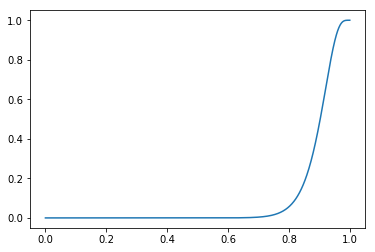

In [46]:
# example graph with given number of bands 'b1' and rows 'r1'

b1 = 5
r1 = 20
print(b1*r1, (1.0/b1)**(1.0/r1))

%matplotlib inline
from matplotlib import pyplot
t = numpy.linspace(0,1,1000)  # just lots of points between 0 and 1 for plotting
p = 1 - numpy.power((1 - numpy.power(t, r1)), b1)  # Formula: p = 1 - (1 - t^r)^b 
pyplot.plot(t, p)
pyplot.show()

In [47]:
(1.0/33)**(1.0/3)

0.311765953881872